In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import collections
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import PCA
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from gensim import corpora, models, matutils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthew.redmond@usfoods.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv("Onion_NYT.csv")

In [5]:
df['Title'] = df['Title'].astype(str)
df['Content'] = df['Content'].astype(str)

In [6]:
df['spacy_Title'] = list(nlp.pipe(df['Title']))
df['spacy_Content'] = list(nlp.pipe(df['Content']))

In [7]:
spstopwords = nlp.Defaults.stop_words

In [8]:
#https://stackoverflow.com/questions/55817040/removing-stop-words-using-spacy
df['Spacy_Title2'] = df.Title.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))
df['Spacy_Content2'] = df.Content.apply(lambda text: 
                                          " ".join(token.lemma_ for token in nlp(text) 
                                                   if not token.is_stop))

In [9]:
titlelistforcv = []
for doc in df.Spacy_Title2:
    titlelistforcv.append(doc)
contentlistforcv = []
for doc in df.Spacy_Content2:
    contentlistforcv.append(doc)
    

In [10]:
cv = CountVectorizer()
X = cv.fit_transform(titlelistforcv)
df2 = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
df2.columns

Index(['000', '00000000001', '00003', '000th', '004', '06', '08', '081', '10',
       '100',
       ...
       'zwirner', 'álvarez', 'élysées', 'émigré', 'éric', 'état', 'étoile',
       'óscar', 'özil', 'ünited'],
      dtype='object', length=26036)

In [11]:
cv = CountVectorizer()
X2 = cv.fit_transform(contentlistforcv)
df_cont = pd.DataFrame(X2.toarray(),columns=cv.get_feature_names())
df_cont.columns

Index(['00', '000', '0000', '00000000001', '0000000001', '00000029', '000001',
       '000002', '000017935', '00003',
       ...
       'ÿ2', '作者价值', '奈苗', '平台价值', '東京', '用户价值', '美苗', '长期', '閱讀繁體中文版',
       '阅读简体中文版'],
      dtype='object', length=57529)

In [12]:
pca_title = PCA(n_components = 10)
pca_title.fit(df2)
pca_title.components_

array([[ 8.37046264e-03, -2.10016994e-05, -2.53647875e-05, ...,
        -2.14096801e-05, -2.18389490e-05, -2.17407151e-05],
       [-5.45624414e-03, -2.39954015e-05, -5.86424848e-05, ...,
        -2.86473559e-05, -2.80408814e-05, -2.81366816e-05],
       [ 7.02455140e-03, -2.88523925e-05, -2.94643505e-05, ...,
        -3.02075369e-05, -3.08858413e-05, -2.92369176e-05],
       ...,
       [ 3.42373552e-03, -3.39325049e-05,  8.21328772e-05, ...,
        -3.07169756e-05, -2.68471255e-05, -2.67778691e-05],
       [ 2.60116438e-02, -4.18662894e-06,  4.88505577e-05, ...,
        -3.31479818e-06, -6.35380884e-06, -3.95841727e-06],
       [ 9.10030103e-03, -3.27772572e-05, -2.55867694e-07, ...,
        -2.34370859e-05, -9.47007438e-06, -2.20455113e-05]])

In [13]:
pca = PCA(n_components = 10)
pca.fit(df_cont)
pca.components_

array([[ 4.33577673e-04,  3.08843944e-02,  1.45601942e-04, ...,
        -1.57529831e-05, -2.32639334e-05, -2.32639334e-05],
       [-2.44567486e-04,  2.56807636e-03, -9.96761347e-05, ...,
        -4.56531588e-06, -7.09195287e-06, -7.09195287e-06],
       [-7.16950695e-05,  8.62560130e-03,  3.87736569e-05, ...,
        -7.41923029e-06, -1.45022512e-06, -1.45022512e-06],
       ...,
       [-4.49628482e-04,  7.74971543e-03, -1.93715808e-04, ...,
        -2.90418650e-05, -1.19028907e-05, -1.19028907e-05],
       [ 8.66125852e-05,  1.07957618e-02, -2.31225248e-06, ...,
        -5.70545220e-06, -4.93791458e-06, -4.93791458e-06],
       [-1.55732707e-04, -1.17097598e-02, -2.82928894e-04, ...,
        -3.68017707e-05,  2.99967791e-06,  2.99967791e-06]])

In [14]:
pca.explained_variance_ratio_

array([0.01831291, 0.00866328, 0.00649753, 0.00544934, 0.00477575,
       0.00425124, 0.00387947, 0.00362295, 0.00333586, 0.00320721])

In [15]:
pca_content5_data = pca.transform(df_cont)

In [16]:
pca_content5_data = pca_content5_data.tolist()

In [17]:
pca_content5_data

[[-0.6137653331979,
  -0.15294145301800918,
  0.02994038167973712,
  -0.2745771471828348,
  -0.03889146519334046,
  0.00760611141975102,
  -0.051629050211918194,
  -0.09691618740148351,
  -0.06377678377475432,
  0.05411114688178078],
 [-0.6572934917986415,
  -0.10886525953372983,
  0.054742451856379,
  -0.20153050431961966,
  -0.1123952680649479,
  0.016944151296946347,
  -0.03302359081365271,
  -0.11033678313081158,
  0.09854893702362158,
  0.003478329709557684],
 [-0.7172344462122691,
  -0.1055556156458197,
  -0.021084973397486353,
  -0.23606940035611448,
  -0.004923465903404885,
  -0.085140408058583,
  -0.03659900182539191,
  -0.09426446005623772,
  -0.029325189334547003,
  -0.020062368775632774],
 [-0.35073195493512954,
  1.1223264794831578,
  -0.12265801143861627,
  -0.1318747728504853,
  0.12635077870009848,
  -0.13974775503390116,
  -0.039048461173210966,
  -0.051055163922787986,
  0.0661284542048259,
  -0.02529301648012103],
 [-0.7519420794432451,
  -0.10907890356297563,
  -0.0

In [18]:
df_cont_2 = pd.DataFrame(pca_content5_data, columns = ['pca_feat1','pca_feat2','pca_feat3','pca_feat4','pca_feat5','pca_feat6','pca_feat7','pca_feat8','pca_feat9','pca_feat10'])

In [19]:
df_cont_2

,pca_feat1,pca_feat2,pca_feat3,pca_feat4,pca_feat5,pca_feat6,pca_feat7,pca_feat8,pca_feat9,pca_feat10
0,-0.613765,-0.152941,0.029940,-0.274577,-0.038891,0.007606,-0.051629,-0.096916,-0.063777,0.054111
1,-0.657293,-0.108865,0.054742,-0.201531,-0.112395,0.016944,-0.033024,-0.110337,0.098549,0.003478
2,-0.717234,-0.105556,-0.021085,-0.236069,-0.004923,-0.085140,-0.036599,-0.094264,-0.029325,-0.020062
3,-0.350732,1.122326,-0.122658,-0.131875,0.126351,-0.139748,-0.039048,-0.051055,0.066128,-0.025293
4,-0.751942,-0.109079,-0.022256,-0.246616,-0.000159,-0.056857,-0.063190,-0.074538,-0.026462,-0.005613
...,...,...,...,...,...,...,...,...,...,...
43456,-0.636977,-0.091110,-0.085945,-0.218281,-0.051027,-0.022708,-0.078984,-0.073808,-0.052008,-0.074684
43457,-0.661186,-0.143428,-0.045094,-0.135767,-0.035957,0.087891,-0.109530,0.035063,-0.122408,0.000358
43458,-0.437777,0.803462,-0.038529,-0.164644,0.012015,-0.066075,-0.078718,-0.113023,0.009320,-0.040746
43459,1.211540,1.458189,-0.553764,-0.020038,-0.590453,-0.227191,-0.213458,-0.188871,0.066577,-0.485955


In [20]:
df4 = pd.merge(df, df_cont_2, left_index=True, right_index=True)

In [2]:
df4

NameError: name 'df4' is not defined

In [21]:
X = df4.iloc[:,8:13]
y = df4["Onion"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [23]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)

In [24]:
#Content PCA Random Forest
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.9757275969170597
0.9411764705882353
0.9071580439404677
0.9238542042583904


In [27]:
print(result)

[0 0 0 ... 0 1 0]


In [28]:
predicted = rf_model.predict(X)

In [29]:
df4['predicted'] = predicted

In [30]:
df4.to_csv("Predicted_pca_rf.csv")

<AxesSubplot:>

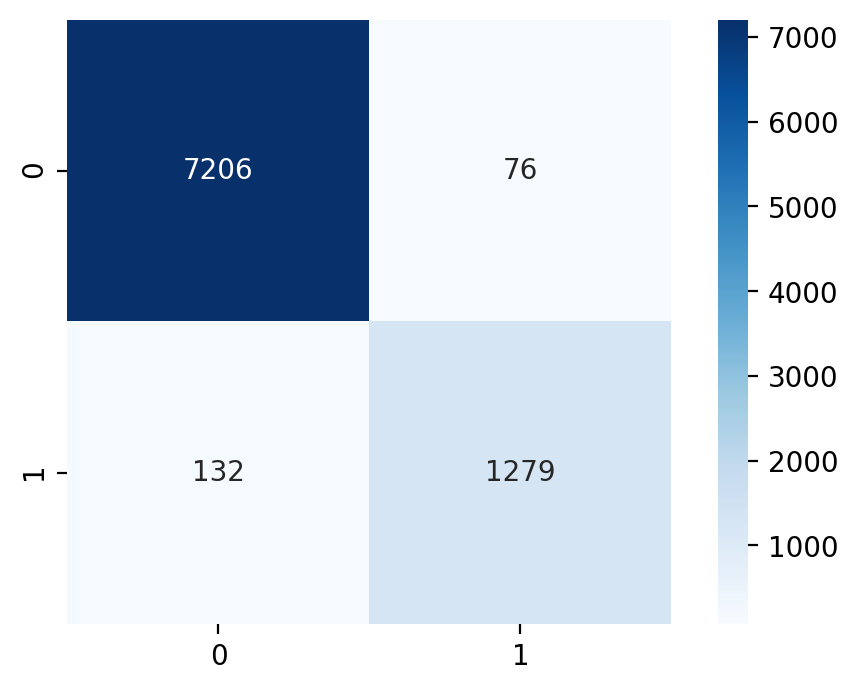

In [67]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [52]:
#boost (vanilla)
bc_model = xgb.XGBClassifier()
bc_model.fit(X_train, y_train)
result = bc_model.predict(X_test)

In [53]:
#Content PCA Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.975152421488554
0.9383712399119589
0.9064493267186393
0.9221341023792358


<AxesSubplot:>

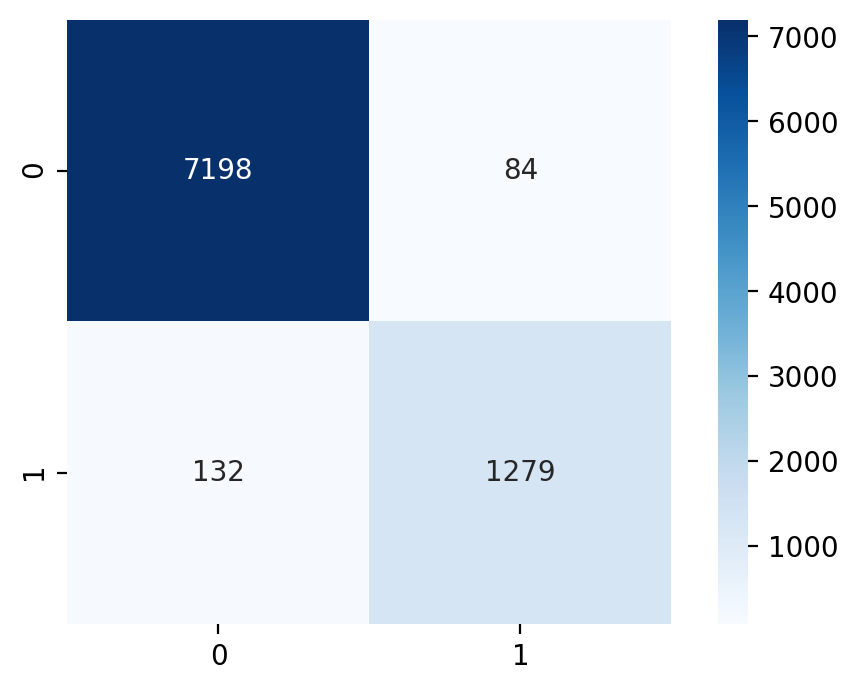

In [54]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [41]:
pca_title5_data = pca_title.transform(df2)

In [42]:
pca_title5_data = pca_title5_data.tolist()

In [43]:
df_title_2 = pd.DataFrame(pca_title5_data, columns = ['pca_feat1','pca_feat2','pca_feat3','pca_feat4','pca_feat5','pca_feat6','pca_feat7','pca_feat8','pca_feat9','pca_feat10'])

In [44]:
df5 = pd.merge(df, df_title_2, left_index=True, right_index=True)

In [55]:
X = df5.iloc[:,8:13]
y = df5["Onion"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [47]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)

In [48]:
#Title PCA Random Forest
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8482687219601979
0.6243243243243243
0.16371367824238128
0.25940482874789444


<AxesSubplot:>

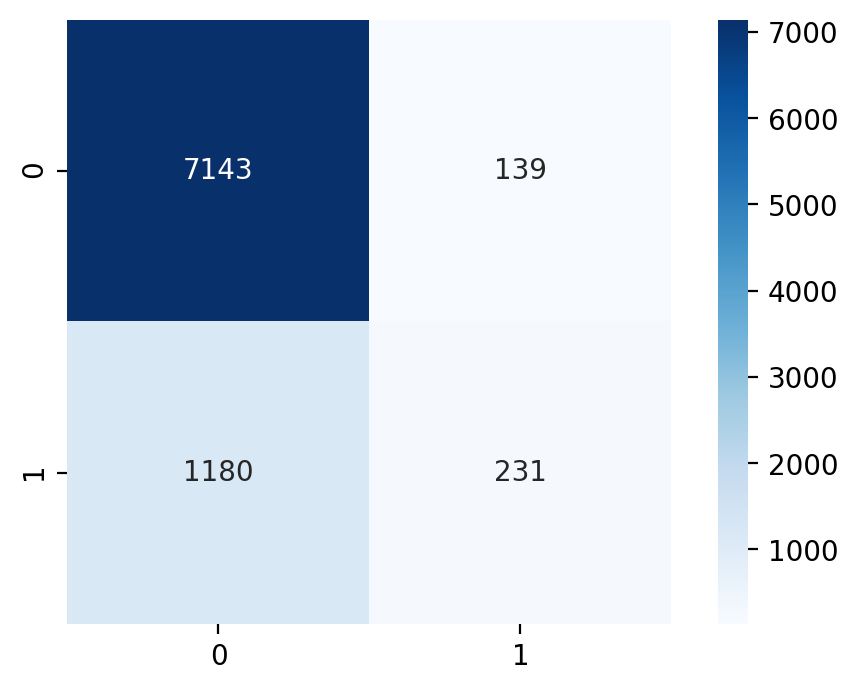

In [49]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [57]:
#boost (vanilla)
bc_model = xgb.XGBClassifier()
bc_model.fit(X_train, y_train)
result = bc_model.predict(X_test)

In [58]:
#Title PCA Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8464281605889796
0.6038251366120219
0.1566265060240964
0.24873382104670794


<AxesSubplot:>

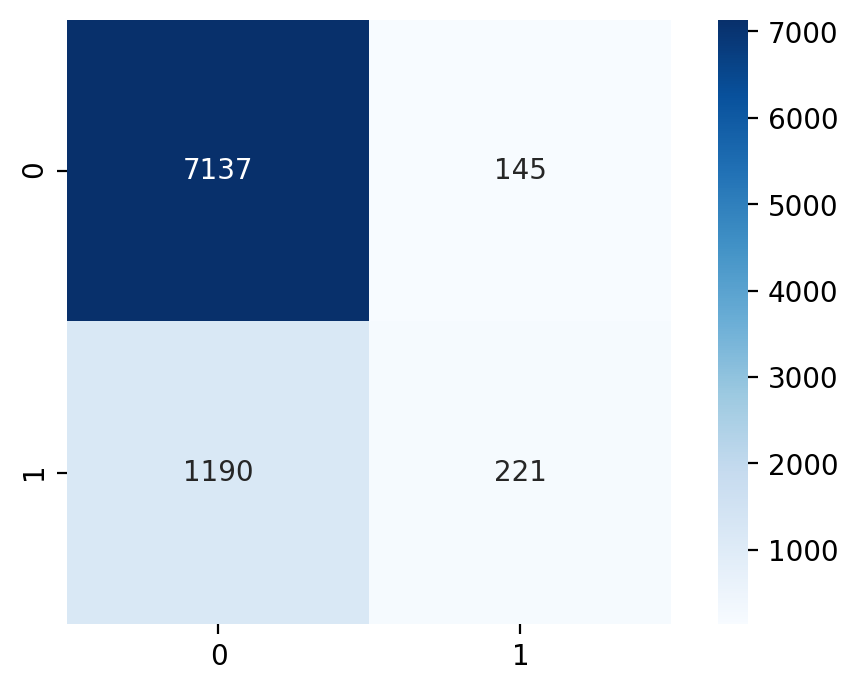

In [59]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [68]:
num_clusters = 2
km = KMeans(n_clusters = num_clusters, random_state=10, n_init=10)
km.fit(X)

KMeans(n_clusters=2, random_state=10)

In [69]:
result = km.predict(X_test)
#Content LSA Boost
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.9697457724606005
0.9456521739130435
0.8632175761871014
0.9025565024082995


<AxesSubplot:>

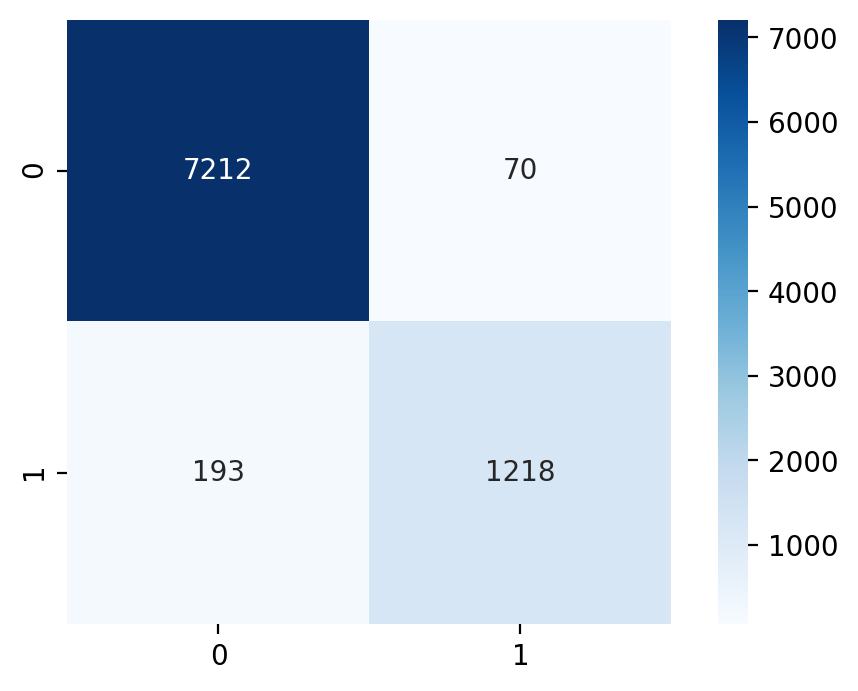

In [70]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")